In [ ]:
#Thank you for the course and extra time to submit final project.
#As I am going from zero to hero, i just played with Tableau practise dataset trying to figure out a thing or two. 
#Will definately keep on learning and practicing


In [701]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb



In [89]:
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [742]:
#Data from Tableau training set
raw_data = pd.read_excel('/Users/olgasperlinga/Downloads/airbnb.xlsx')

In [741]:
raw_data.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaT,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaT,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaT,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [5]:
raw_data.tail()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
30473,43022976,2015-08-31,10 Mins to Time Square/two floors,Queens,Apartment,NaN,Entire home/apt,11101.0,5.0,1,0,300,NaN
30474,42993382,2015-08-31,"1BR ocean view & F,Q train st",Brooklyn,Apartment,NaN,Private room,11224.0,2.0,1,0,125,NaN
30475,43033067,2015-08-31,Amazing Private Room,Brooklyn,Other,NaN,Private room,11206.0,1.0,1,0,80,NaN
30476,43000991,2015-08-31,Charming private female room: UWS,Manhattan,Apartment,NaN,Private room,10025.0,1.0,1,0,35,NaN
30477,42999189,2015-08-31,Huge Beautiful Bedroom - Astoria,Queens,House,NaN,Private room,11105.0,1.0,1,0,80,NaN


In [4]:
raw_data.shape

(30478, 13)

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
Host Id                       30478 non-null int64
Host Since                    30475 non-null datetime64[ns]
Name                          30478 non-null object
Neighbourhood                 30478 non-null object
Property Type                 30475 non-null object
Review Scores Rating (bin)    22155 non-null float64
Room Type                     30478 non-null object
Zipcode                       30344 non-null float64
Beds                          30393 non-null float64
Number of Records             30478 non-null int64
Number Of Reviews             30478 non-null int64
Price                         30478 non-null int64
Review Scores Rating          22155 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 3.0+ MB


In [7]:
raw_data.describe()

,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
count,3.047800e+04,22155.000000,30344.000000,30393.000000,30478.0,30478.000000,30478.000000,22155.000000
mean,1.273171e+07,90.738659,10584.854831,1.530089,1.0,12.018735,163.589737,91.993230
std,1.190270e+07,9.059519,921.299397,1.015359,0.0,21.980703,197.785454,8.850373
min,5.000000e+02,20.000000,1003.000000,0.000000,1.0,0.000000,10.000000,20.000000
25%,2.701298e+06,85.000000,10017.000000,1.000000,1.0,0.000000,80.000000,89.000000
50%,8.551693e+06,90.000000,10065.000000,1.000000,1.0,3.000000,125.000000,94.000000
75%,2.120617e+07,100.000000,11216.000000,2.000000,1.0,13.000000,195.000000,100.000000
max,4.303307e+07,100.000000,99135.000000,16.000000,1.0,257.000000,10000.000000,100.000000


In [735]:
raw_data.describe(include=['O'])

,Name,Neighbourhood,Property Type,Room Type
count,30478,30478,30475,30478
unique,29416,5,19,3
top,Charming West Village studio,Manhattan,Apartment,Entire home/apt
freq,15,16033,27102,17024


In [736]:
raw_data.dtypes

Host Id                                int64
Host Since                    datetime64[ns]
Name                                  object
Neighbourhood                         object
Property Type                         object
Review Scores Rating (bin)           float64
Room Type                             object
Zipcode                              float64
Beds                                 float64
Number of Records                      int64
Number Of Reviews                      int64
Price                                  int64
Review Scores Rating                 float64
dtype: object

In [745]:
raw_data['Property Type'].unique()

array(['Apartment', 'House', 'Other', 'Bed & Breakfast', 'Loft',
       'Condominium', 'Townhouse', nan, 'Dorm', 'Boat', 'Cabin', 'Villa',
       'Bungalow', 'Camper/RV', 'Treehouse', 'Tent', 'Hut', 'Lighthouse',
       'Chalet', 'Castle'], dtype=object)

In [737]:
data_less_cols = raw_data.drop(['Zipcode','Name','Host Since','Host Id','Number of Records','Review Scores Rating (bin)','Number Of Reviews'], axis=1)
data_less_cols.head(10)

,Neighbourhood,Property Type,Room Type,Beds,Price,Review Scores Rating
0,Brooklyn,Apartment,Entire home/apt,1.0,145,NaN
1,Brooklyn,Apartment,Private room,1.0,37,NaN
2,Manhattan,Apartment,Private room,1.0,28,NaN
3,Manhattan,Apartment,Entire home/apt,3.0,199,NaN
4,Manhattan,Apartment,Private room,3.0,549,96.0
5,Brooklyn,Apartment,Entire home/apt,1.0,149,100.0
6,Manhattan,Apartment,Entire home/apt,1.0,250,100.0
7,Brooklyn,Apartment,Private room,1.0,90,94.0
8,Manhattan,Apartment,Entire home/apt,2.0,270,90.0
9,Manhattan,Apartment,Entire home/apt,2.0,290,96.0


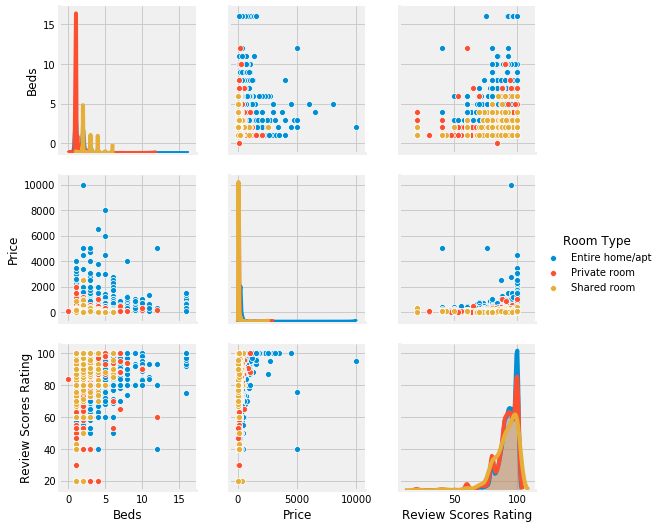

In [738]:
sb.pairplot(data_less_cols, hue='Room Type')

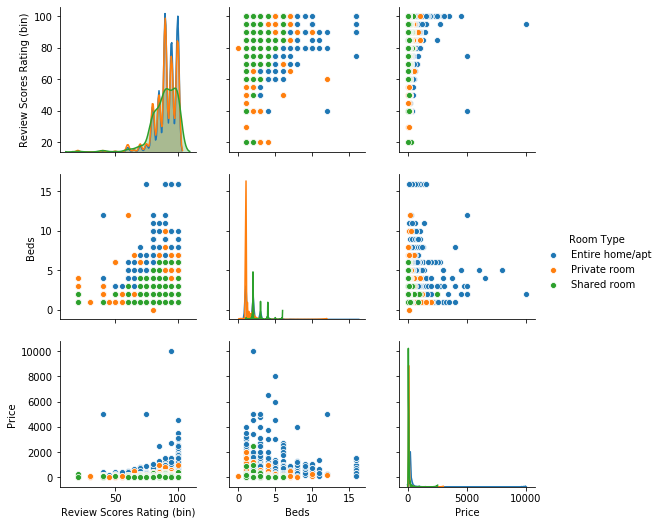

In [72]:
sb.pairplot(data_less_cols, hue='Room Type')


In [744]:
#Need to fix appartment with one and two p
set(raw_data['Property Type'])

{'Apartment',
 'Bed & Breakfast',
 'Boat',
 'Bungalow',
 'Cabin',
 'Camper/RV',
 'Castle',
 'Chalet',
 'Condominium',
 'Dorm',
 'House',
 'Hut',
 'Lighthouse',
 'Loft',
 'Other',
 'Tent',
 'Townhouse',
 'Treehouse',
 'Villa',
 nan}

In [585]:
data_less_cols.loc[data_less_cols['Property Type'] == 'Appartment', 'Property Type'] = 'Apartment'



In [746]:
set(data_less_cols['Property Type'])

{'Apartment',
 'Bed & Breakfast',
 'Boat',
 'Bungalow',
 'Cabin',
 'Camper/RV',
 'Castle',
 'Chalet',
 'Condominium',
 'Dorm',
 'House',
 'Hut',
 'Lighthouse',
 'Loft',
 'Other',
 'Tent',
 'Townhouse',
 'Treehouse',
 'Villa',
 nan}

In [548]:
set(data_less_cols['Room Type'])

{'Entire home/apt', 'Private room', 'Shared room'}

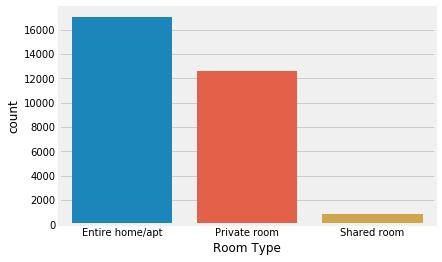

In [747]:
sb.countplot('Room Type',data=raw_data)
plt.show()

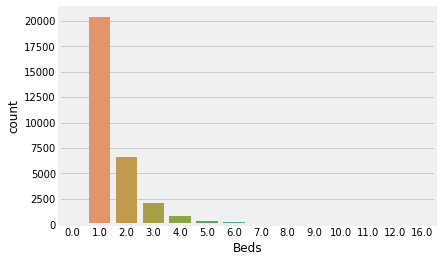

In [748]:
sb.countplot('Beds',data=raw_data)
plt.show()

In [551]:
#Dealing with missing values

In [749]:
data_less_cols.isnull().sum()

Neighbourhood              0
Property Type              3
Room Type                  0
Beds                      85
Price                      0
Review Scores Rating    8323
dtype: int64

In [753]:
noType=raw_data.loc[(raw_data["Property Type"].isnull())]
noType

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
433,58979,2009-12-01,Bright and Cheery Chelsea Studio,Manhattan,NaN,95.0,Private room,10011.0,1.0,1,28,165,98.0
7893,2837739,2012-07-05,Hip & Spacious 1BD in the LES,Manhattan,NaN,85.0,Entire home/apt,10002.0,1.0,1,24,150,89.0
20551,16915992,2014-06-17,Entire home/apt in New York,Manhattan,NaN,NaN,Entire home/apt,10002.0,2.0,1,0,120,NaN


In [754]:
#based on Name of property decided to change all three NaN proprty type to apartment
raw_data.loc[(raw_data['Property Type'].isnull()), 'Property Type'] = 'Apartment'
             

In [755]:
raw_data.isnull().sum()

Host Id                          0
Host Since                       3
Name                             0
Neighbourhood                    0
Property Type                    0
Review Scores Rating (bin)    8323
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8323
dtype: int64

In [592]:
#filtering properties with missing Beds value
no_beds=raw_data.loc[(raw_data["Beds"].isnull()) ]
len(no_beds)

85

In [593]:
#out of missing beds 30 are entire properties, will leave it for now as name/description dosnt help in all cases 
entire_no_Beds=raw_data.loc[(raw_data["Room Type"] =="Entire home/apt") &
                            (raw_data["Beds"].isnull())]
entire_no_Beds

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
470,61531,2009-12-09,Red Hook Modern,Brooklyn,Apartment,75.0,Entire home/apt,11231.0,NaN,1,7,145,79.0
1821,315654,2010-12-11,AUTHENTIC TRIBECA LOFT,Manhattan,Apartment,90.0,Entire home/apt,10013.0,NaN,1,21,300,92.0
2840,645887,2011-05-31,Great place in Brooklyn!,Brooklyn,House,NaN,Entire home/apt,11211.0,NaN,1,0,123,NaN
4067,1199375,2011-09-23,fabuolus spacious apartment,Queens,Apartment,NaN,Entire home/apt,11368.0,NaN,1,0,80,NaN
6493,2149806,2012-04-16,Cozy Apartment in Williamsburg,Brooklyn,Apartment,80.0,Entire home/apt,11206.0,NaN,1,2,110,80.0
7089,2435392,2012-05-22,huge duplex in brownstone (1bd),Brooklyn,Apartment,100.0,Entire home/apt,11238.0,NaN,1,1,500,100.0
7385,2586337,2012-06-09,HUGE w/ Professional Kitchen,Brooklyn,Apartment,100.0,Entire home/apt,11217.0,NaN,1,2,150,100.0
7668,2733465,2012-06-24,HUGE SUNNY 1 bdrm @SoHo killer apt!,Manhattan,Apartment,100.0,Entire home/apt,10012.0,NaN,1,3,224,100.0
8799,3369487,2012-08-25,Cute Studio near Union Square,Manhattan,Apartment,95.0,Entire home/apt,10003.0,NaN,1,10,199,96.0
9932,4080391,2012-11-06,"Upper West Side, NYC",Manhattan,Apartment,70.0,Entire home/apt,10025.0,NaN,1,1,150,70.0


In [341]:
no_beds1=no_beds.loc[(no_beds["Room Type"]== 'Entire home/apt')]
no_beds1

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
470,61531,2009-12-09,Red Hook Modern,Brooklyn,Apartment,75.0,Entire home/apt,11231.0,NaN,1,7,145,79.0
1821,315654,2010-12-11,AUTHENTIC TRIBECA LOFT,Manhattan,Apartment,90.0,Entire home/apt,10013.0,NaN,1,21,300,92.0
2840,645887,2011-05-31,Great place in Brooklyn!,Brooklyn,House,NaN,Entire home/apt,11211.0,NaN,1,0,123,NaN
4067,1199375,2011-09-23,fabuolus spacious apartment,Queens,Apartment,NaN,Entire home/apt,11368.0,NaN,1,0,80,NaN
6493,2149806,2012-04-16,Cozy Apartment in Williamsburg,Brooklyn,Apartment,80.0,Entire home/apt,11206.0,NaN,1,2,110,80.0
7089,2435392,2012-05-22,huge duplex in brownstone (1bd),Brooklyn,Apartment,100.0,Entire home/apt,11238.0,NaN,1,1,500,100.0
7385,2586337,2012-06-09,HUGE w/ Professional Kitchen,Brooklyn,Apartment,100.0,Entire home/apt,11217.0,NaN,1,2,150,100.0
7668,2733465,2012-06-24,HUGE SUNNY 1 bdrm @SoHo killer apt!,Manhattan,Apartment,100.0,Entire home/apt,10012.0,NaN,1,3,224,100.0
8799,3369487,2012-08-25,Cute Studio near Union Square,Manhattan,Apartment,95.0,Entire home/apt,10003.0,NaN,1,10,199,96.0
9932,4080391,2012-11-06,"Upper West Side, NYC",Manhattan,Apartment,70.0,Entire home/apt,10025.0,NaN,1,1,150,70.0


In [760]:
len(entire_no_Beds)

30

In [596]:
#just one shared room with missing Beds value
raw_data.loc[((raw_data["Room Type"]== 'Shared room') & (raw_data["Beds"].isnull()))]

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
9570,3857651,2012-10-13,Couch to surf on,Manhattan,Apartment,NaN,Shared room,10018.0,NaN,1,0,400,NaN


In [761]:
Private =raw_data.loc[((raw_data["Room Type"]== 'Private room') & (raw_data["Beds"].isnull()))]
len(Private)

54

In [785]:
#54 private , 1 shared room and 30 entire properties with missing Beds values, totoal 85
rooms=no_beds.loc[(no_beds["Room Type"]== 'Shared room') |(no_beds["Room Type"] == "Private room")]
len(rooms)


55

In [786]:
#cant work out how to use both & and | to fix directly raw_data
rooms_fixed = rooms.loc[rooms['Beds'].isnull(),'Beds']=1

In [787]:
rooms.isnull().sum()

Host Id                        0
Host Since                     0
Name                           0
Neighbourhood                  0
Property Type                  0
Review Scores Rating (bin)    32
Room Type                      0
Zipcode                        1
Beds                           0
Number of Records              0
Number Of Reviews              0
Price                          0
Review Scores Rating          32
dtype: int64

In [756]:
#properties with no reviews
no_review = raw_data.loc[(raw_data['Review Scores Rating (bin)'].isnull()) |
              (raw_data['Review Scores Rating'].isnull())]
no_review.head()


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaT,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaT,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaT,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
13,2787,2008-09-07,Renovated and spacious townhome,Brooklyn,House,NaN,Private room,11223.0,1.0,1,0,68,NaN


In [757]:
len(no_review)

8323

In [771]:
raw_data.isnull().sum()

Host Id                          0
Host Since                       3
Name                             0
Neighbourhood                    0
Property Type                    0
Review Scores Rating (bin)    8323
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8323
dtype: int64

In [567]:
#Exploring the data
grouped = data_less_cols.groupby(['Property Type']).count()
grouped


,Neighbourhood,Room Type,Beds,Price,Review Scores Rating
Property Type,,,,,
Apartment,27102,27102,27025,27102,19656
Appartment,3,3,3,3,2
Bed & Breakfast,180,180,180,180,136
Boat,8,8,8,8,6
Bungalow,4,4,4,4,3
Cabin,2,2,2,2,2
Camper/RV,7,7,7,7,6
Castle,1,1,1,1,1
Chalet,1,1,1,1,1


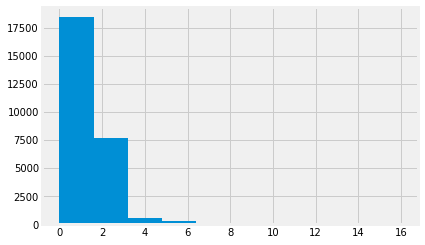

In [602]:
data_less_cols.loc[data_less_cols['Property Type'] == 'Apartment', 'Beds'].hist()

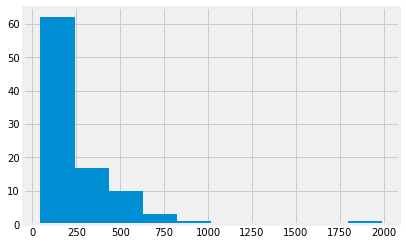

In [576]:
data_less_cols.loc[data_less_cols['Property Type'] == 'Condominium', 'Price'].hist()

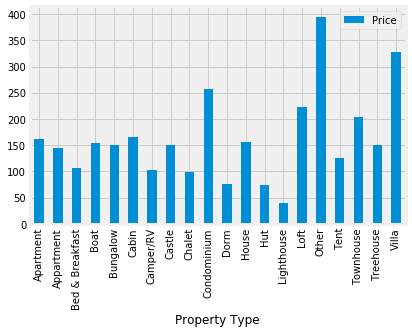

In [603]:
raw_data[["Price",'Property Type']].groupby(["Property Type"]).mean().plot.bar()
plt.show()

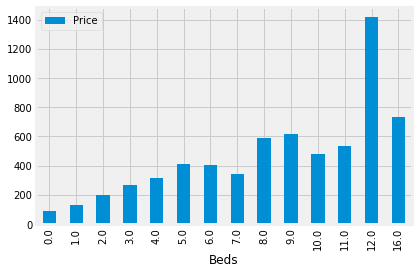

In [433]:
#avarage price depending on amount of rooms
data_less_cols[['Price','Beds']].groupby(['Beds']).mean().plot.bar()
plt.show()

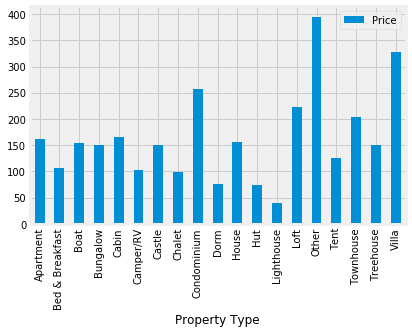

In [114]:
#avarage price depending on the room
data_less_cols[['Price','Property Type']].groupby(['Property Type']).mean().plot.bar()
plt.show()

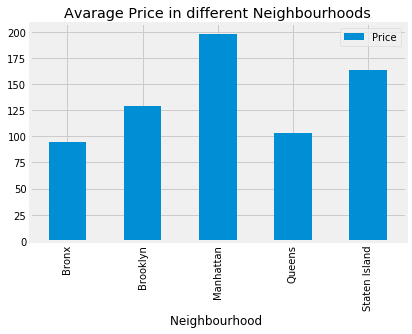

In [437]:
#avarage price depending on the room
data_less_cols[['Price','Neighbourhood ']].groupby(['Neighbourhood ']).mean().plot.bar()
plt.title('Avarage Price in different Neighbourhoods')
plt.show()

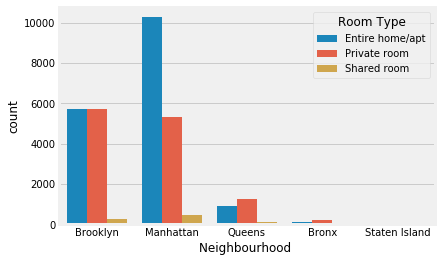

In [716]:
sb.countplot('Neighbourhood ',hue='Room Type',data=raw_data)
plt.show()

In [720]:

ctab = pd.crosstab([data_less_cols['Property Type'],data_less_cols["Room Type"]],data_less_cols.Beds,margins=True)
ctab


Beds                             0.0    1.0   2.0   3.0  4.0  5.0  6.0  7.0  \
Property Type   Room Type                                                     
Apartment       Entire home/apt    0   8209  4948  1599  553  179   97   30   
                Private room       2   9638   881   135   31    6    4    3   
                Shared room        0    570    78    19   12    1    4    0   
Bed & Breakfast Entire home/apt    0      5     4     0    1    1    0    0   
                Private room       0    114    32     4    4    0    1    0   
                Shared room        0      7     2     0    2    0    1    0   
Boat            Entire home/apt    0      2     5     0    0    0    0    0   
                Private room       0      0     0     0    1    0    0    0   
Bungalow        Entire home/apt    0      2     1     1    0    0    0    0   
Cabin           Entire home/apt    0      1     0     0    0    0    0    0   
                Private room       0      0     0     1    0    0    0    0   
Camper/RV       Entire home/apt    0      2     0     1    2    0    0    1   
                Private room       0      1     0     0    0    0    0    0   
Castle          Private room       0      1     0     0    0    0    0    0   
Chalet          Private room       0      1     0     0    0    0    0    0   
Condominium     Entire home/apt    0     33    24     8    2    2    2    1   
                Private room       0     20     1     0    1    0    0    0   
Dorm            Entire home/apt    0      1     2     0    0    0    1    0   
                Private room       0     10     4     1    0    0    0    0   
                Shared room        0      7     1     3    0    0    0    0   
House           Entire home/apt    0    125   186   166  103   75   48    8   
                Private room       0    972   223    42   10    0    2    1   
                Shared room        0     52    14     0    9    2    3    0   
Hut             Private room       0      1     1     0    0    0    0    0   
Lighthouse      Entire home/apt    0      0     1     0    0    0    0    0   
Loft            Entire home/apt    0    149   125    62   35   11    8    0   
                Private room       0    271    28     8    3    2    0    0   
                Shared room        0     40     6     1    1    1    0    0   
Other           Entire home/apt    0     10     3     1    0    0    0    0   
                Private room       0     23     5     1    0    0    0    0   
                Shared room        0      3     0     0    0    0    1    0   
Tent            Private room       0      4     0     0    0    0    0    0   
Townhouse       Entire home/apt    0     25    23    12   12    4    4    1   
                Private room       0     40     9     3    0    0    0    0   
                Shared room        0      1     0     0    0    0    0    0   
Treehouse       Private room       0      1     0     0    0    0    0    0   
                Shared room        0      0     1     2    0    0    0    0   
Villa           Entire home/apt    0      0     2     0    1    0    1    0   
                Private room       0      3     0     1    0    0    0    0   
All                                2  20344  6610  2071  783  284  177   45   

Beds                             8.0  9.0  10.0  11.0  12.0  16.0    All  
Property Type   Room Type                                                 
Apartment       Entire home/apt   10    7     5     2     1     2  15642  
                Private room       0    0     1     0     1     0  10702  
                Shared room        0    0     0     0     0     0    684  
Bed & Breakfast Entire home/apt    0    1     1     0     0     0     13  
                Private room       0    0     0     0     0     0    155  
                Shared room        0    0     0     0     0     0     12  
Boat            Entire home/apt    0    0     0     0     0     0      7  
      

In [397]:
Tent = data_less_cols[data_less_cols['Property Type'] =="Tent"]
Tent

,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Beds,Price
13172,Brooklyn,Tent,NaN,Private room,1.0,65
15741,Manhattan,Tent,NaN,Private room,1.0,150
21720,Brooklyn,Tent,NaN,Private room,1.0,250
23702,Brooklyn,Tent,NaN,Private room,1.0,40


In [160]:
Tent.max()

Neighbourhood                    Manhattan
Property Type                         Tent
Review Scores Rating (bin)            None
Room Type                     Private room
Beds                                     1
Price                                  250
dtype: object

In [722]:
raw_data[(raw_data["Room Type"] == 'Shared room') & (raw_data['Property Type'] == "Townhouse")]

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
25357,25502436,2015-01-02,Private space in Brooklyn Heights,Brooklyn,Townhouse,NaN,Shared room,11201.0,1.0,1,0,95,NaN


In [734]:
print('The most expensive stay is :', "$",data_less_cols['Price'].max())

print('The cheapest stay in a tent is :', "$",Tent['Price'].min())

The most expensive stay is : $ 10000
The cheapest stay in a tent is : $ 40


In [407]:
Lighthouse = data_less_cols[data_less_cols['Property Type'] =="Lighthouse"]
Lighthouse

,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Beds,Price
14200,Brooklyn,Lighthouse,100.0,Entire home/apt,2.0,39


In [469]:
Entire_homes = data_less_cols.loc[data_less_cols["Room Type"] =="Entire home/apt"]
len(Entire_homes)

17024

In [467]:
import statsmodels.api as sm
import sklearn

In [470]:
Entire_homes.describe()

,Review Scores Rating (bin),Beds,Price
count,12884.000000,16994.000000,17024.000000
mean,91.236805,1.822349,220.796346
std,8.318247,1.200117,242.222346
min,20.000000,1.000000,10.000000
25%,90.000000,1.000000,135.000000
50%,90.000000,1.000000,175.000000
75%,100.000000,2.000000,240.000000
max,100.000000,16.000000,10000.000000


In [491]:
final_data1 =Entire_homes.dropna()
len(final_data1)

12862

In [493]:
Entire_homes.isnull().sum()

Neighbourhood                    0
Property Type                    2
Review Scores Rating (bin)    4140
Room Type                        0
Beds                            30
Price                            0
dtype: int64

In [526]:
final_data = Entire_homes.copy()

In [524]:
#Price V Beds
y = final_data["Price"]
x1 =final_data["Beds"]

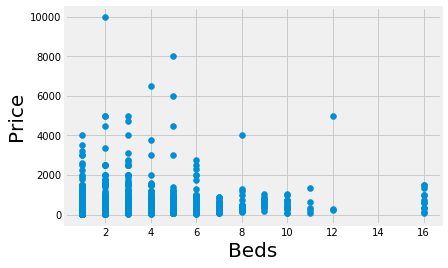

In [525]:
plt.scatter(x1,y)
plt.xlabel("Beds",fontsize =20)
plt.ylabel("Price",fontsize =20)
plt.show()
#doesnt look like there is correlation between rooms and price

In [544]:
#Price V Review Score
y = final_data2["Price"]
x1 =final_data2["Review Scores Rating (bin)"]

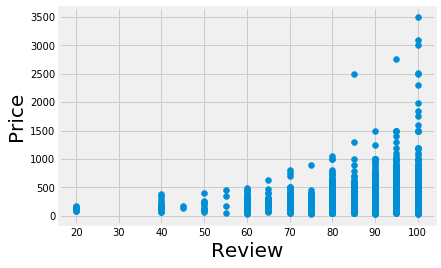

In [545]:
plt.scatter(x1,y)
plt.xlabel("Review",fontsize =20)
plt.ylabel("Price",fontsize =20)
plt.show()

In [577]:
final_data2=final_data1.loc[(final_data['Price']<4500)]
len(final_data2)


12858

In [578]:
final_data1.loc[(final_data['Price'] > 4500)]


,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Beds,Price
1275,Manhattan,Apartment,75.0,Entire home/apt,2.0,5000
7550,Staten Island,House,40.0,Entire home/apt,12.0,5000
23927,Manhattan,Apartment,95.0,Entire home/apt,2.0,10000


In [579]:
x2 = sm.add_constant(x1)


In [580]:
results = sm.OLS(y,x2).fit()


In [582]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     49.40
Date:                Fri, 10 Jan 2020   Prob (F-statistic):           2.19e-12
Time:                        00:32:31   Log-Likelihood:                -81481.
No. Observations:               12858   AIC:                         1.630e+05
Df Residuals:                   12856   BIC:                         1.630e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        108.5290     13.305      8.157      0.000      82.449     134.609
Review Scores Rating (bin)     1.0207      0.145      7.029      0.000       0.736       1.305
==============================================================================
Omnibus:                    16727.930   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5847769.245
Skew:                           7.059   Prob(JB):                         0.00
Kurtosis:                     106.517   Cond. No.                     1.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

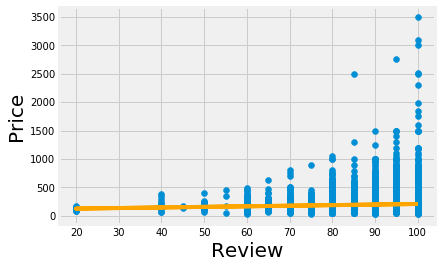

In [583]:

plt.scatter(x1,y)

yhat = 1.0207*x1 + 108.5290	

fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')

plt.xlabel('Review', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.show()

In [667]:
#Price based on reviews doesnt work, trying sometning more specific, apartments in one area without outliers
Apartment = final_data2[final_data2['Property Type'] =="Apartment"]
len(Apartment)                           

11832

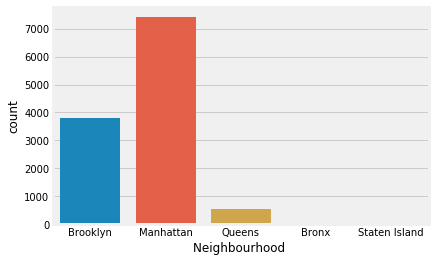

In [672]:
#The most apartments ar in manhattan
sb.countplot('Neighbourhood ',data=Apartment)
plt.show()

In [776]:
Manhattan = Apartment[(Apartment['Neighbourhood ']=="Manhattan") & (Apartment["Price"]<2000)]
len(Manhattan)

7404

In [775]:
Manhattan.describe()

,Review Scores Rating (bin),Beds,Price
count,7388.000000,7388.000000,7388.000000
mean,90.881159,1.677721,214.983216
std,8.433670,0.997333,106.553004
min,20.000000,1.000000,50.000000
25%,85.000000,1.000000,150.000000
50%,90.000000,1.000000,190.000000
75%,100.000000,2.000000,250.000000
max,100.000000,16.000000,995.000000


In [680]:
Manhattan.isnull().sum()

Neighbourhood                 0
Property Type                 0
Review Scores Rating (bin)    0
Room Type                     0
Beds                          0
Price                         0
dtype: int64

In [687]:
Manhattan.head()

,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Beds,Price
6,Manhattan,Apartment,100.0,Entire home/apt,1.0,250
8,Manhattan,Apartment,90.0,Entire home/apt,2.0,270
9,Manhattan,Apartment,95.0,Entire home/apt,2.0,290
14,Manhattan,Apartment,95.0,Entire home/apt,1.0,285
18,Manhattan,Apartment,85.0,Entire home/apt,3.0,150


In [693]:
y = Manhattan["Price"]
x1 =Manhattan[["Review Scores Rating (bin)","Beds"]]

In [694]:
x2 = sm.add_constant(x1)


In [695]:
results = sm.OLS(y,x2).fit()

In [696]:
#Still doesnt look good
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     821.1
Date:                Fri, 10 Jan 2020   Prob (F-statistic):          8.89e-323
Time:                        02:08:06   Log-Likelihood:                -45082.
No. Observations:                7404   AIC:                         9.017e+04
Df Residuals:                    7401   BIC:                         9.019e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -40.8431     14.110     -2.895      0.004     -68.502     -13.184
Review Scores Rating (bin)     1.9086      0.149     12.800      0.000       1.616       2.201
Beds                          50.3617      1.258     40.028      0.000      47.895      52.828
==============================================================================
Omnibus:                     5873.340   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           282632.368
Skew:                           3.414   Prob(JB):                         0.00
Kurtosis:                      32.488   Cond. No.                     1.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""